# TASK 2 : MOVIE RATING PREDICTION WITH PYTHON

### importing required libraries

In [1]:
import pandas as pd 
import numpy as np 

### movie data 

In [2]:
movie_df=pd.read_csv('movies.dat_task2', sep = '::',engine='python')

In [3]:
movie_df.columns =['MovieIDs','Moviename','Category']

In [4]:
movie_df.dropna(inplace=True)

In [5]:
movie_df.head()

,MovieIDs,Moviename,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


### rating data 

In [6]:
rating_df=pd.read_csv('ratings.dat_task2',sep= '::',engine='python')

In [7]:
rating_df.columns=['ID','MovieID','Ratings','Timestamp']

In [8]:
rating_df.dropna(inplace=True)

In [9]:
rating_df.head()

,ID,MovieID,Ratings,Timestamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


### user data 

In [10]:
user_df=pd.read_csv('users.dat_task2',sep='::',engine='python')

In [11]:
user_df.columns=['UserID','Gender','Age','Occupation','Zip-code']

In [12]:
user_df.dropna(inplace=True)

In [13]:
user_df.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


### concating all  the 3 datasets 

In [14]:
df=pd.concat([movie_df,rating_df,user_df],axis=1)

In [15]:
df.head()

,MovieIDs,Moviename,Category,ID,MovieID,Ratings,Timestamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


In [16]:
df.describe()

,MovieIDs,ID,MovieID,Ratings,Timestamp,UserID,Age,Occupation
count,3882.000000,1.000208e+06,1.000208e+06,1.000208e+06,1.000208e+06,6039.000000,6039.000000,6039.000000
mean,1986.560793,3.024515e+03,1.865541e+03,3.581563e+00,9.722437e+08,3021.000000,30.644146,8.146547
std,1146.483260,1.728411e+03,1.096041e+03,1.117102e+00,1.215256e+07,1743.453469,12.891387,6.329991
min,2.000000,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,2.000000,1.000000,0.000000
25%,983.250000,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08,1511.500000,25.000000,3.000000
50%,2010.500000,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08,3021.000000,25.000000,7.000000
75%,2980.750000,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08,4530.500000,35.000000,14.000000
max,3952.000000,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09,6040.000000,56.000000,20.000000


In [17]:
df.shape

(1000208, 12)

## Performing EDA on the df 

### importing required libraries for visualisation 

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Movie Categories

In [19]:
# Splitting the  categories and count the top ones
categories = df['Category'].str.split('|', expand=True).stack()
top_categories = categories.value_counts().head(10)

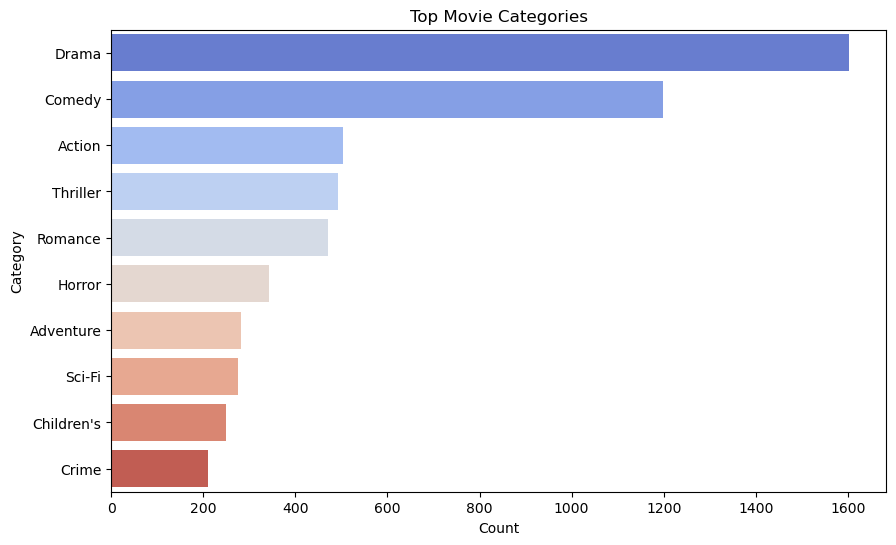

In [20]:
# Plotting the top categories
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='coolwarm')
plt.xlabel('Count')
plt.ylabel('Category')
plt.title('Top Movie Categories')
plt.show()

### Gender based Ratings

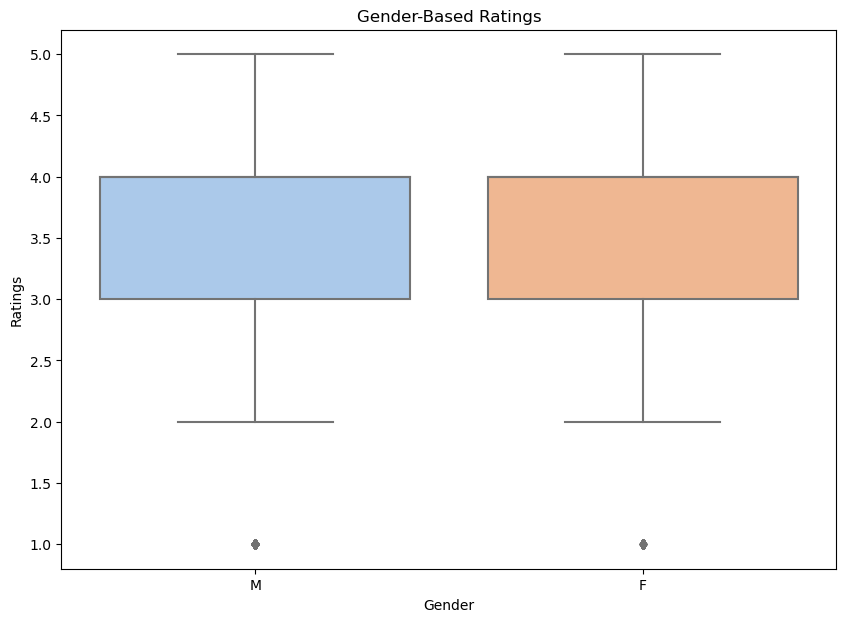

In [21]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Gender', y='Ratings', data=df, palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Ratings')
plt.title('Gender-Based Ratings')
plt.show()


### visualize user age distribution

,Age,age_group
0,56.0,50-59
1,25.0,20-29
2,45.0,40-49
4,50.0,50-59
5,35.0,30-39
16,18.0,10-19
17,1.0,0-9
6039,NaN,NaN


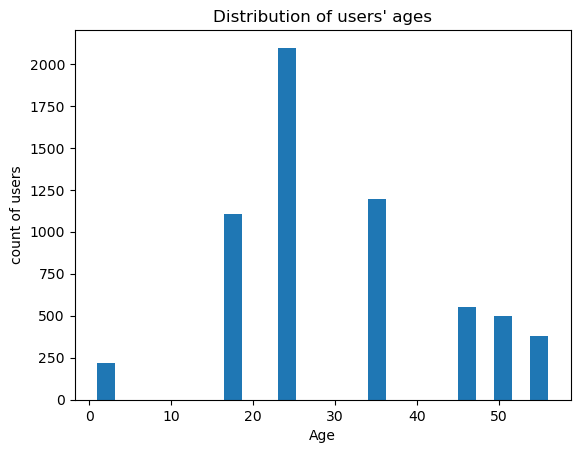

In [22]:
df.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=labels)
df[['Age', 'age_group']].drop_duplicates()[:10]

### Movie Ratings

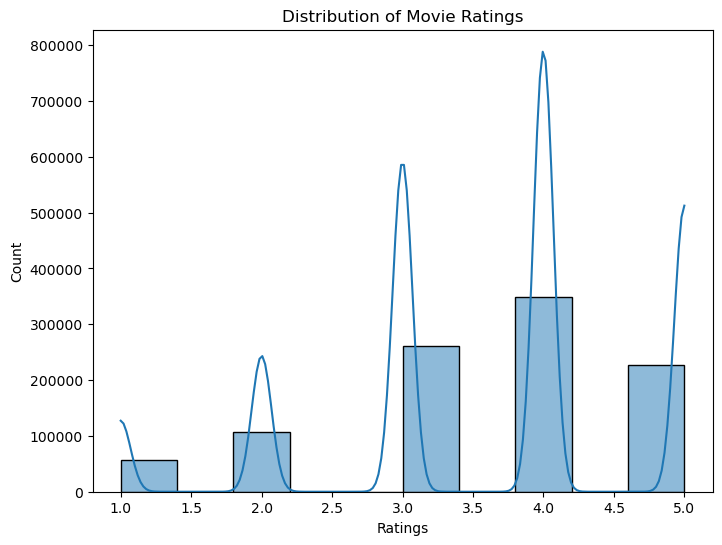

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Ratings'], bins=10, kde=True)
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Distribution of Movie Ratings')
plt.show()


### User ratings over Time

C:\Users\Dell\AppData\Local\Temp\ipykernel_13448\3060870866.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Ratings', data=df, ci=None)


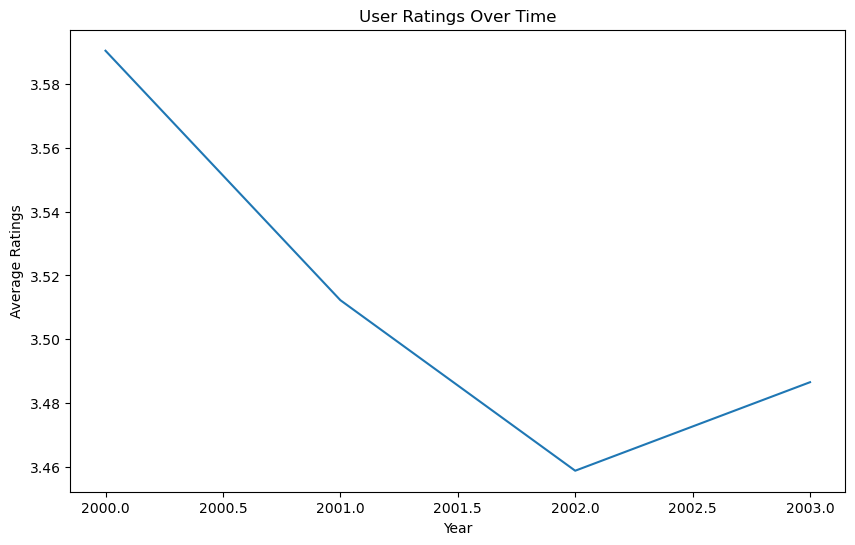

In [24]:
from datetime import datetime

df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df['Year'] = df['Timestamp'].dt.year
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Ratings', data=df, ci=None)
plt.xlabel('Year')
plt.ylabel('Average Ratings')
plt.title('User Ratings Over Time')
plt.show()


### Top rated movies

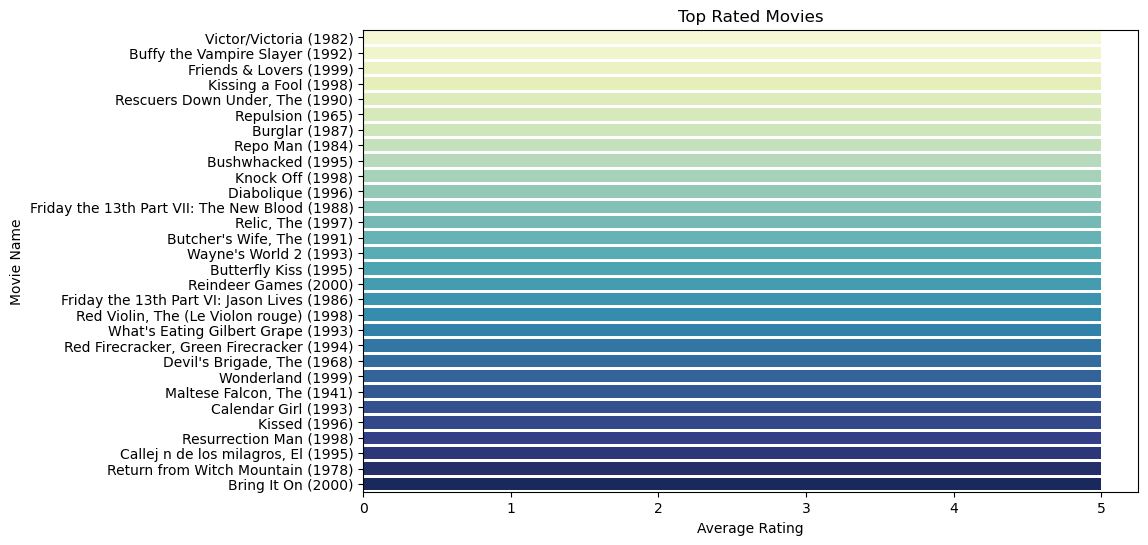

In [25]:
top_rated = df.groupby('Moviename')['Ratings'].mean().sort_values(ascending=False).head(30)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_rated.values, y=top_rated.index, palette='YlGnBu')
plt.xlabel('Average Rating')
plt.ylabel('Movie Name')
plt.title('Top Rated Movies')
plt.show()


## buliding model 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

First 500 records are extracted

In [27]:
first_500 = df[500:]
first_500.dropna(inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13448\3388945548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_500.dropna(inplace=True)


In [28]:
features = first_500[['MovieID','Age','Occupation']].values

In [29]:
#Use rating as label
labels = first_500[['Ratings']].values

Create train and test data set

In [30]:
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

###  Logistic Regression


In [31]:
logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


32.76

###  Decision Tree

In [32]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

98.54

### Random Forest

In [33]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

C:\Users\Dell\AppData\Local\Temp\ipykernel_13448\3903029764.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(train, train_labels)


98.54

### comparing the models  

In [34]:
models = pd.DataFrame({
    'Model': ['Random Forest','Decision Tree','Logistic Regression'],
    'Score': [acc_random_forest,acc_decision_tree,acc_log]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest,98.54
1,Decision Tree,98.54
2,Logistic Regression,32.76
